In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime as dt
#import missingno as msno
#from textwrap import wrap

In [5]:
transaction_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','Transactions')
customer_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','NewCustomerList')
customer_demo_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')
customer_add_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress')

C:\Users\ruize\AppData\Local\Temp/ipykernel_11644/906407188.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  customer_demo_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')


In [7]:
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [8]:
transaction_df.columns = transaction_df.iloc[0]
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [9]:
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True)

In [10]:
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [11]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.1+ MB


In [12]:
transaction_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [13]:
print(transaction_df.isnull().values.sum())
transaction_df=transaction_df.replace(' ',np.NaN)
transaction_df=transaction_df.fillna(transaction_df.mean())
print(transaction_df.isnull().values.sum())

1542
788


C:\Users\ruize\AppData\Local\Temp/ipykernel_11644/4007293066.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  transaction_df=transaction_df.fillna(transaction_df.mean())


In [19]:
print(transaction_df.info())
transaction_df['product_line'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            20000 non-null  float64
 12  product_first_sold_date  20000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 2.1+ MB
None


Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [14]:
for col in transaction_df.columns:
    if transaction_df[col].dtypes == 'object':
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
print(transaction_df.isnull().values.sum())

0


# EDA

In [47]:
customer_demo_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaT,120.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaT,120.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaT,120.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaT,120.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [48]:
customer_demo_df.info()
customer_demo_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  3999 non-null   float64       
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

,customer_id,past_3_years_bike_related_purchases,age,tenure
count,4000.000000,4000.000000,3999.000000,3913.000000
mean,2000.500000,48.890000,44.054514,10.657041
std,1154.844867,28.715005,16.858429,5.660146
min,1.000000,0.000000,18.000000,1.000000
25%,1000.750000,24.000000,33.000000,6.000000
50%,2000.500000,48.000000,43.000000,11.000000
75%,3000.250000,73.000000,53.000000,15.000000
max,4000.000000,99.000000,120.000000,22.000000


In [49]:
print(customer_demo_df.isnull().values.sum())
customer_demo_df=customer_demo_df.replace(' ',np.NaN)
customer_demo_df=customer_demo_df.fillna(customer_demo_df.mean())
print(customer_demo_df.isnull().values.sum())

1337
1249


C:\Users\ruize\AppData\Local\Temp/ipykernel_11644/1325837236.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  customer_demo_df=customer_demo_df.fillna(customer_demo_df.mean())
C:\Users\ruize\AppData\Local\Temp/ipykernel_11644/1325837236.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  customer_demo_df=customer_demo_df.fillna(customer_demo_df.mean())


In [50]:
customer_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  4000 non-null   float64       
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [25]:
for col in customer_demo_df.columns:
    if customer_demo_df[col].dtypes == 'object':
        customer_demo_df[col] = customer_demo_df[col].fillna(customer_demo_df[col].value_counts().index[0])
print(customer_demo_df.isnull().values.sum())
print(customer_demo_df.describe())
print(customer_demo_df.info())

87
       customer_id  past_3_years_bike_related_purchases          age  \
count  4000.000000                          4000.000000  4000.000000   
mean   2000.500000                            48.890000    44.054514   
std    1154.844867                            28.715005    16.856321   
min       1.000000                             0.000000    18.000000   
25%    1000.750000                            24.000000    33.000000   
50%    2000.500000                            48.000000    43.000000   
75%    3000.250000                            73.000000    53.000000   
max    4000.000000                            99.000000   120.000000   

            tenure  
count  4000.000000  
mean     10.657041  
std       5.598238  
min       1.000000  
25%       6.000000  
50%      10.657041  
75%      15.000000  
max      22.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null C

In [51]:
customer_demo_df['age'] = customer_demo_df['age'].astype(np.int64)
m = customer_demo_df['age'].mean()
customer_demo_df['age'] = customer_demo_df['age'].replace(120,m).round()
# age=120,wrong data

In [52]:
customer_demo_df.head()
customer_demo_df.describe()

,customer_id,past_3_years_bike_related_purchases,age,tenure
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,48.890000,42.401500,10.657041
std,1154.844867,28.715005,12.486924,5.598238
min,1.000000,0.000000,18.000000,1.000000
25%,1000.750000,24.000000,33.000000,6.000000
50%,2000.500000,48.000000,43.000000,10.657041
75%,3000.250000,73.000000,52.000000,15.000000
max,4000.000000,99.000000,88.000000,22.000000


Text(0.5, 0, 'Age')

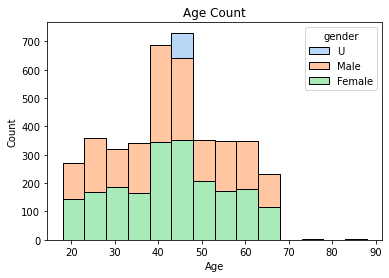

In [53]:
sns.histplot(x=customer_demo_df['age'],hue=customer_demo_df['gender'],binwidth=5,palette='pastel',multiple='stack')
plt.title('Age Count')
plt.xlabel('Age')

Text(0.5, 0, 'Wealth Segment')

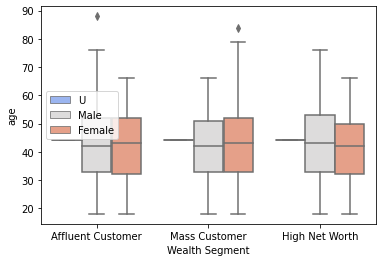

In [54]:
sns.boxplot(x=customer_demo_df['wealth_segment'], y=customer_demo_df['age'],hue=customer_demo_df['gender'],data=customer_demo_df,palette="coolwarm")
plt.legend(loc = 'best')
plt.xlabel('Wealth Segment')

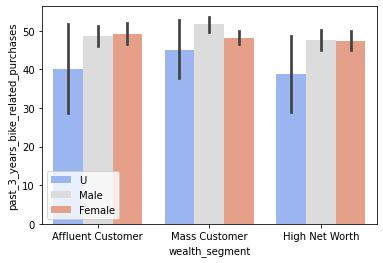

In [55]:
sns.barplot(x=customer_demo_df['wealth_segment'], y=customer_demo_df['past_3_years_bike_related_purchases'],hue=customer_demo_df['gender'],data=customer_demo_df,estimator=np.mean,ci=95,color=None, palette='coolwarm',errcolor=".26")
plt.legend(loc='best')

In [56]:
transaction_df['year']=transaction_df['transaction_date'].dt.year
transaction_df['month']=transaction_df['transaction_date'].dt.month
transaction_df['year_month']= transaction_df['year'].map(str)+'-'+transaction_df['month'].map(str)
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex,year,month,year_month
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01,1,2017,2,2017-2
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01,5,2017,5,2017-5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01,10,2017,10,2017-10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01,7,2017,8,2017-8
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01,10,2017,10,2017-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-01,2017-01-01,6,2017,6,2017-6
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-01,2017-01-01,11,2017,11,2017-11
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-01,2017-04-01,1,2017,4,2017-4
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-01,2017-02-01,6,2017,7,2017-7


<Figure size 1440x720 with 0 Axes>

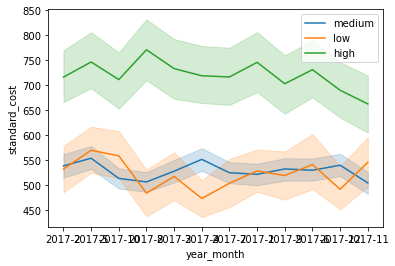

<Figure size 1440x720 with 0 Axes>

In [60]:
sns.lineplot(data=transaction_df,x=transaction_df['year_month'],y=transaction_df['standard_cost'],hue=transaction_df['product_class'],palette="tab10",linewidth=1.5)
plt.legend(loc='best')
plt.figure(figsize=(20, 10))

In [61]:
tran_cust_df=pd.merge(transaction_df,customer_demo_df,how='left',on='customer_id')
tran_cust_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,Male,19.0,1955-01-11,65.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,Female,89.0,1979-02-04,41.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,Male,9.0,1977-06-03,43.0,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,Male,83.0,1962-01-14,58.0,Staff Scientist,Financial Services,Mass Customer,N,No,16.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,Female,29.0,1996-12-15,23.0,NaN,Retail,Affluent Customer,N,Yes,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,...,Male,1.0,1994-11-27,25.0,Help Desk Operator,Manufacturing,Mass Customer,N,Yes,7.0
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,...,Female,81.0,1974-12-03,45.0,Compensation Analyst,Financial Services,Mass Customer,N,No,19.0
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,...,Female,83.0,1974-02-16,46.0,Staff Accountant IV,Telecommunications,High Net Worth,N,No,14.0
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,...,Female,12.0,1955-03-29,65.0,NaN,Financial Services,Mass Customer,N,Yes,20.0


In [62]:
customerline=tran_cust_df.groupby(['customer_id','year_month'])['standard_cost'].sum().reset_index()
customerline

,customer_id,year_month,standard_cost
0,1,2017-1,270.300000
1,1,2017-12,965.650000
2,1,2017-2,53.620000
3,1,2017-3,1377.840000
4,1,2017-4,826.510000
...,...,...,...
15882,3500,2017-3,874.900000
15883,3500,2017-4,53.620000
15884,3500,2017-8,1167.180000
15885,5034,2017-1,937.700012


<Figure size 1440x720 with 0 Axes>

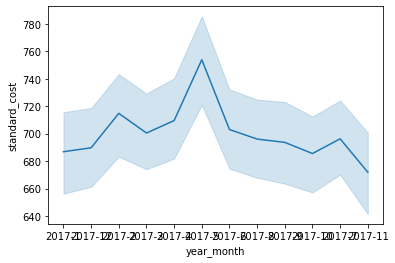

<Figure size 1440x720 with 0 Axes>

In [67]:
sns.lineplot(data=customerline,x=customerline['year_month'],y=customerline['standard_cost'],palette='tab10',linewidth=1.5)
plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

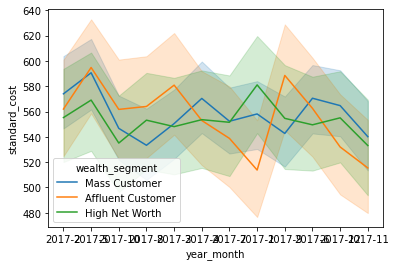

<Figure size 1440x720 with 0 Axes>

In [70]:
sns.lineplot(data=tran_cust_df,x=tran_cust_df['year_month'],y=tran_cust_df['standard_cost'],hue=tran_cust_df['wealth_segment'],palette="tab10",linewidth=1.5)
plt.figure(figsize=(20, 10))

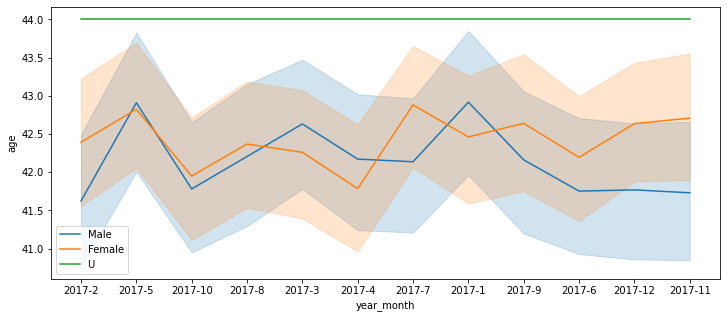

In [148]:
sns.lineplot(data=tran_cust_df,x=tran_cust_df['year_month'],y=tran_cust_df['age'],hue=tran_cust_df['gender'],palette="tab10",linewidth=1.5)
rcParams['figure.figsize'] = 13,5
plt.legend(loc='best')

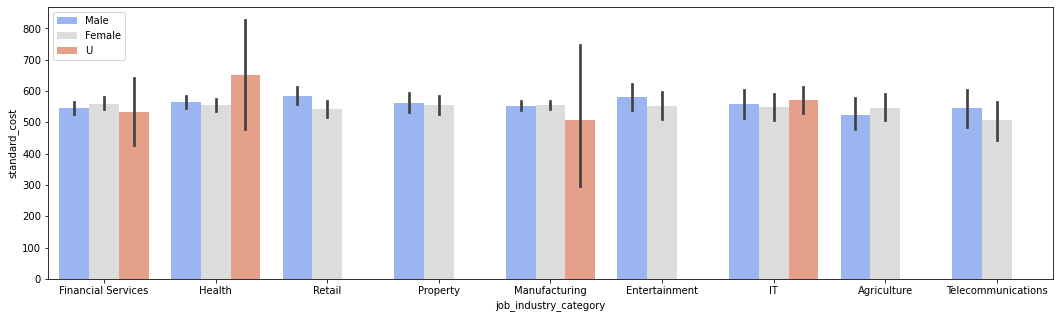

In [180]:
sns.barplot(x=tran_cust_df['job_industry_category'], y=tran_cust_df['standard_cost'],hue=tran_cust_df['gender'],data=tran_cust_df,estimator=np.mean,ci=95,color=None, palette='coolwarm',errcolor=".26")
plt.legend(loc='best')
rcParams['figure.figsize'] = 20,5

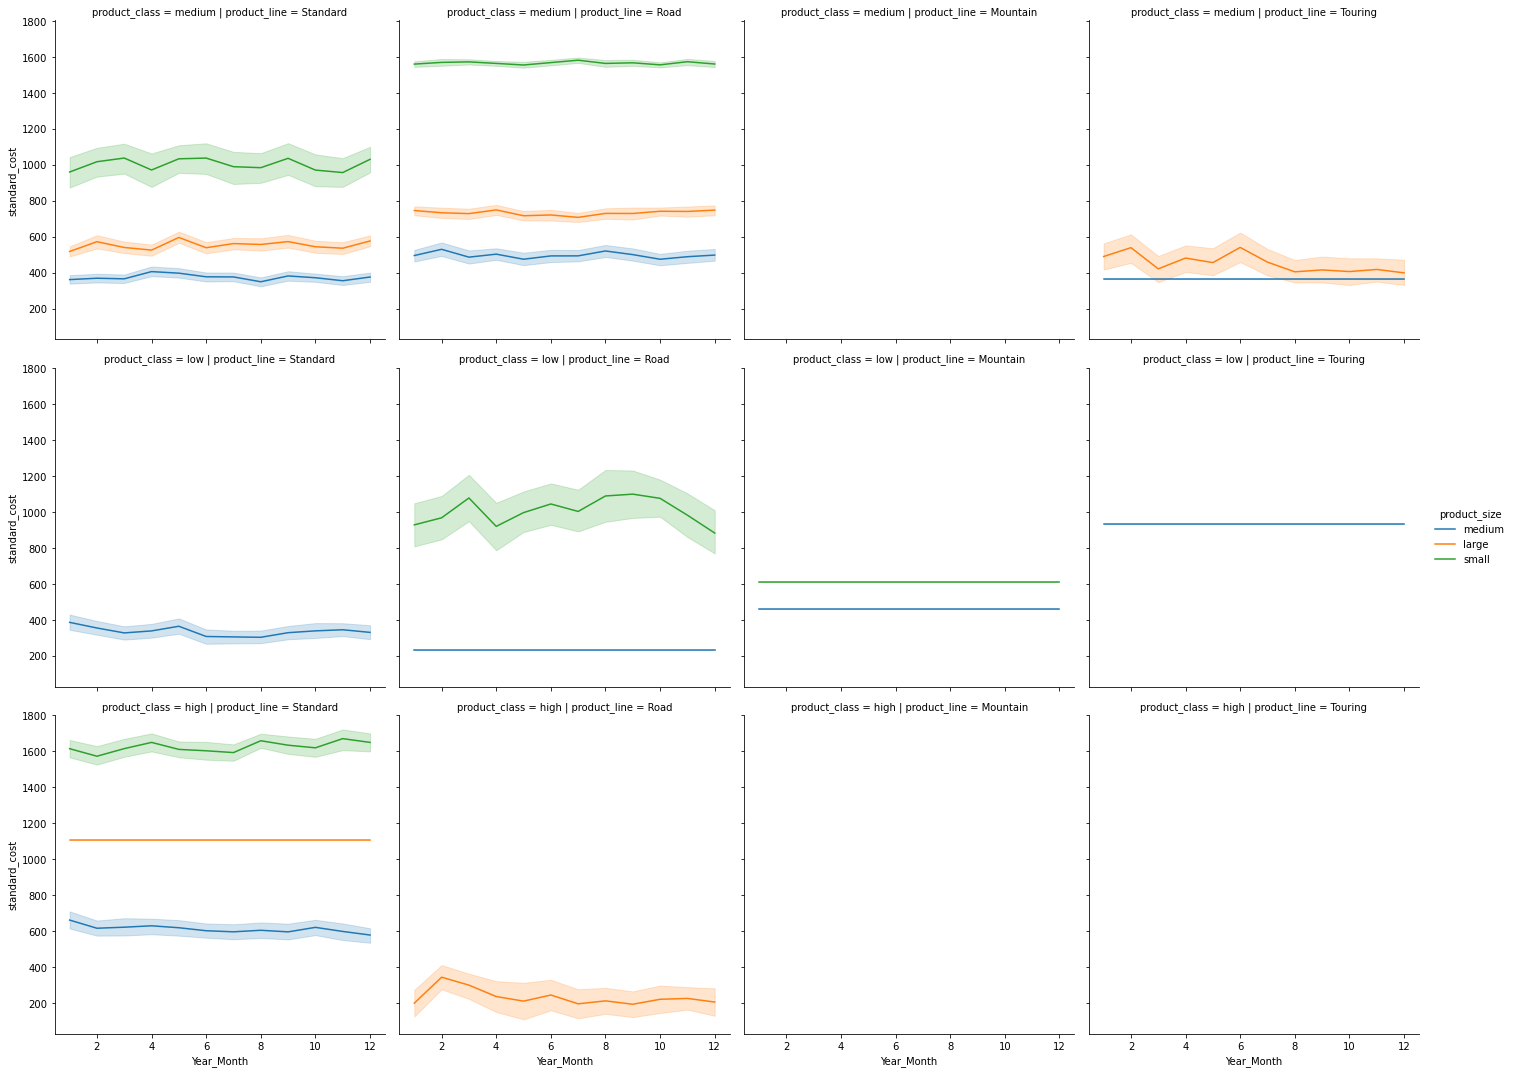

In [168]:
sns.color_palette('pastel')
ax = sns.relplot(data=tran_cust_df, kind='line', x=tran_cust_df['month'],y=tran_cust_df['standard_cost'],hue=tran_cust_df['product_size'],col=tran_cust_df['product_line'], row=tran_cust_df['product_class'])
ax.set(xlabel="Year_Month")
plt.show()

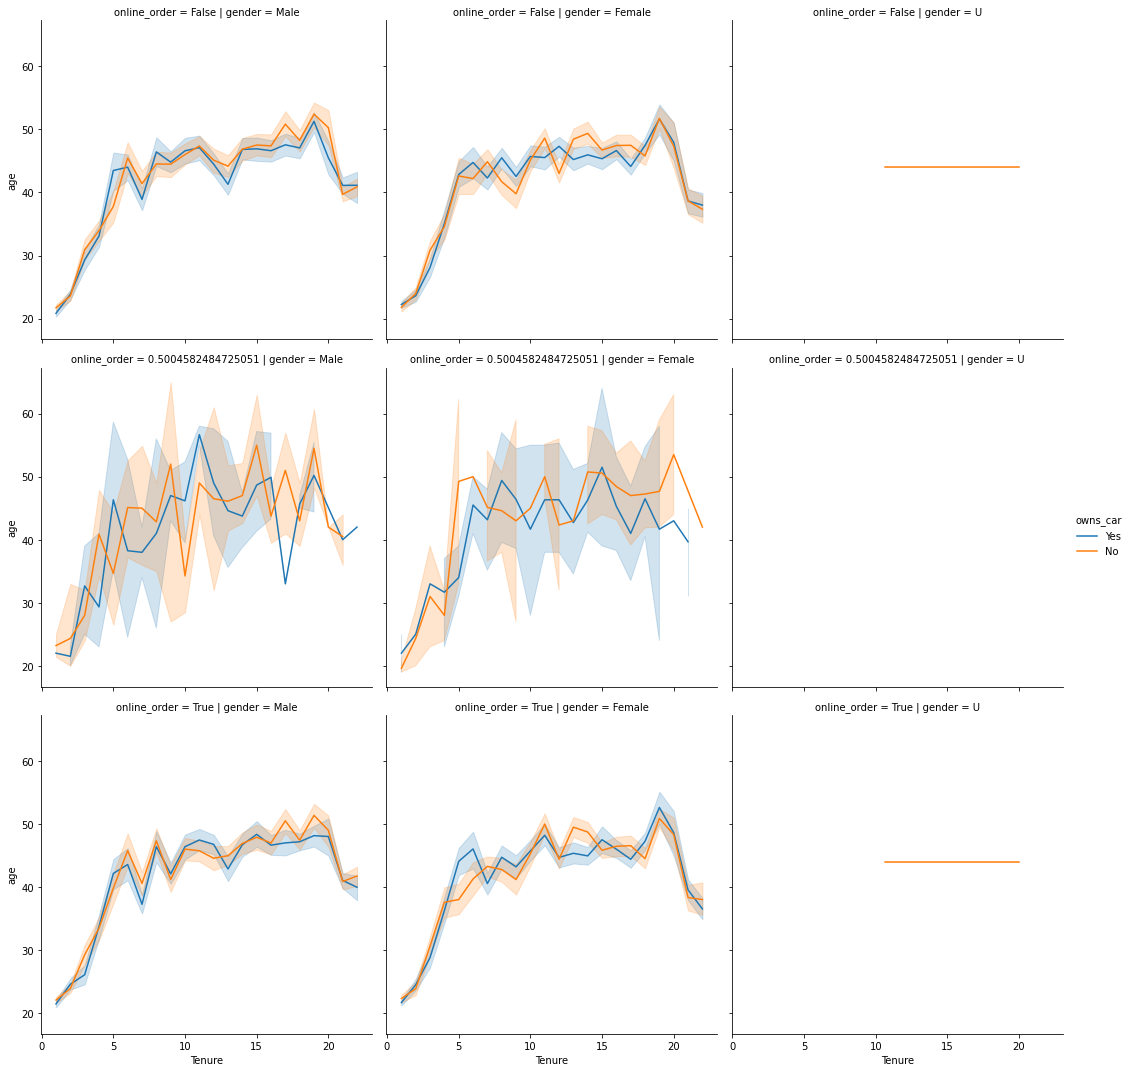

In [178]:
sns.color_palette('pastel')
ax = sns.relplot(data=tran_cust_df, kind='line', x=tran_cust_df['tenure'],y=tran_cust_df['age'],hue=tran_cust_df['owns_car'],col=tran_cust_df['gender'], row=tran_cust_df['online_order'])
ax.set(xlabel="Tenure")
plt.show()

## Cohort Analysis

In [15]:
dt.datetime(transaction_df['transaction_date'][1].year, transaction_df['transaction_date'][1].month, 1)

datetime.datetime(2017, 2, 1, 0, 0)

In [16]:
def get_month(x): 
  return dt.datetime(x.year, x.month, 1) 
transaction_df['TransactionMonth'] = transaction_df['transaction_date'].apply(get_month) 
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-01
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-01
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-01
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-01


In [17]:
transaction_df.groupby('customer_id')['TransactionMonth'].transform('min')

1       2017-02-01
2       2017-01-01
3       2017-01-01
4       2017-02-01
5       2017-01-01
           ...    
19996   2017-01-01
19997   2017-01-01
19998   2017-04-01
19999   2017-02-01
20000   2017-03-01
Name: TransactionMonth, Length: 20000, dtype: datetime64[ns]

In [20]:
grouping = transaction_df.groupby('customer_id')['TransactionMonth'] 
transaction_df['CohortMonth'] = grouping.transform('min')
print(transaction_df.head())

0  transaction_id  product_id  customer_id transaction_date online_order  \
1               1           2         2950       2017-02-25        False   
2               2           3         3120       2017-05-21         True   
3               3          37          402       2017-10-16        False   
4               4          88         3135       2017-08-31        False   
5               5          78          787       2017-10-01         True   

0 order_status           brand product_line product_class product_size  \
1     Approved           Solex     Standard        medium       medium   
2     Approved   Trek Bicycles     Standard        medium        large   
3     Approved      OHM Cycles     Standard           low       medium   
4     Approved  Norco Bicycles     Standard        medium       medium   
5     Approved  Giant Bicycles     Standard        medium        large   

0  list_price  standard_cost  product_first_sold_date TransactionMonth  \
1       71.49          5

In [21]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
transcation_year, transaction_month, _ = get_date_int(transaction_df, 'TransactionMonth')
cohort_year, cohort_month, _ = get_date_int(transaction_df, 'CohortMonth')

In [22]:
years_diff = transcation_year - cohort_year
months_diff = transaction_month - cohort_month
transaction_df['CohortIndex'] = years_diff * 12 + months_diff  + 1 
transaction_df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01,10


In [23]:
cohort_data = transaction_df.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


In [188]:
cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0] 
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


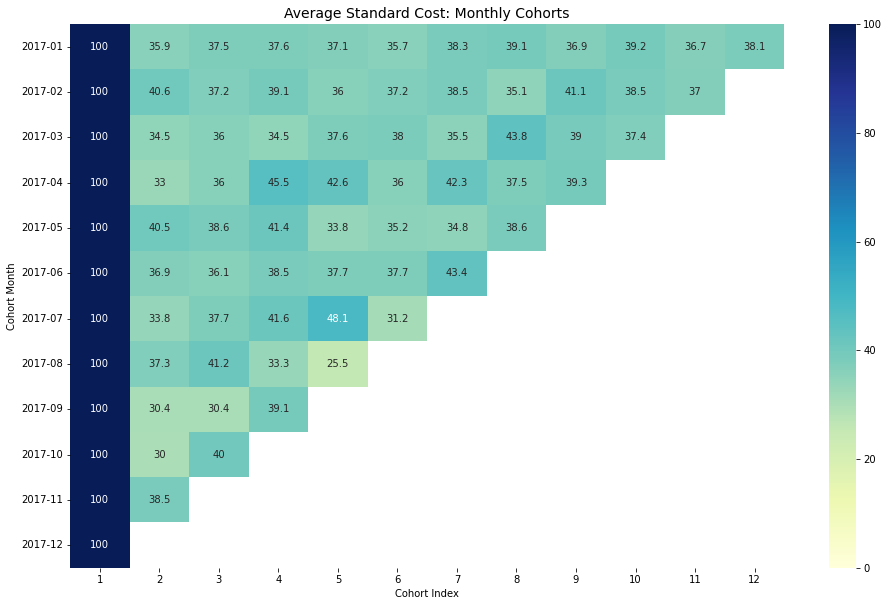

In [190]:
retention = retention.round(3)*100
retention.index = retention.index.strftime('%Y-%m')
plt.figure(figsize=(16, 10))
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

Text(0, 0.5, 'Cohort Counts')

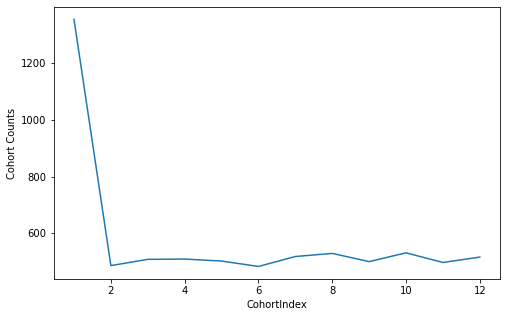

In [196]:
sns.lineplot(data=cohort_counts,x=cohort_counts.columns,y=cohort_counts.loc['2017-01-01'],palette='tab10',linewidth=1.5)
rcParams['figure.figsize'] = 8,5
ylabel('Cohort Counts')

In [71]:
#cohortmonth 2017-01-01,corhortIndex<=2 merger customer_demo,EDA
transaction_20170101_df = transaction_df[(transaction_df['CohortMonth']== '2017-01-01')&(transaction_df['CohortIndex'] < 3)]

In [72]:
trans_cust_20170101_df = pd.merge(transaction_20170101_df,customer_demo_df,how='left',on='customer_id')
trans_cust_20170101_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,11,5,1986,2017-01-17,False,Approved,Trek Bicycles,Mountain,low,medium,...,Female,53.0,1981-12-30,38.0,NaN,Retail,Mass Customer,N,No,16.0
1,12,61,2783,2017-01-05,True,Approved,OHM Cycles,Standard,low,medium,...,Male,14.0,1978-08-24,41.0,Sales Representative,Retail,Affluent Customer,N,Yes,7.0
2,13,35,1243,2017-02-26,True,Approved,Trek Bicycles,Standard,low,medium,...,Male,73.0,1953-08-09,66.0,Research Assistant II,Retail,Mass Customer,N,No,8.0
3,20,25,3002,2017-01-28,True,Approved,Giant Bicycles,Road,medium,medium,...,Male,62.0,1956-12-06,63.0,Paralegal,Financial Services,Mass Customer,N,Yes,16.0
4,26,64,2596,2017-01-10,False,Approved,Trek Bicycles,Standard,medium,large,...,Female,51.0,1976-08-20,43.0,Assistant Professor,NaN,Affluent Customer,N,Yes,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,19948,33,3495,2017-02-28,False,Approved,OHM Cycles,Road,medium,small,...,Female,57.0,1987-07-12,32.0,Programmer III,Financial Services,High Net Worth,N,No,8.0
2291,19965,6,721,2017-01-15,False,Approved,OHM Cycles,Standard,high,medium,...,Female,84.0,1993-08-09,26.0,Account Representative III,NaN,Affluent Customer,N,Yes,1.0
2292,19977,44,1102,2017-01-02,False,Approved,WeareA2B,Standard,medium,medium,...,Female,16.0,1976-08-17,43.0,Recruiting Manager,Manufacturing,Affluent Customer,N,No,15.0
2293,19990,55,135,2017-01-27,True,Cancelled,Trek Bicycles,Road,medium,large,...,Female,18.0,1975-01-18,45.0,Internal Auditor,IT,Mass Customer,N,No,3.0


<AxesSubplot:xlabel='wealth_segment', ylabel='standard_cost'>

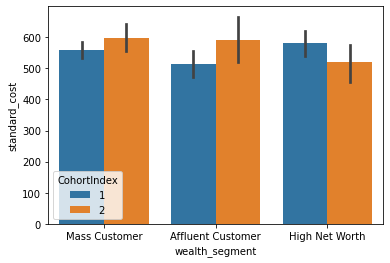

In [73]:
sns.barplot(x=trans_cust_20170101_df['wealth_segment'], y=trans_cust_20170101_df['standard_cost'], hue=trans_cust_20170101_df['CohortIndex'], data=trans_cust_20170101_df, estimator=np.mean, ci=95, 
               n_boot=1000, 
               color=None, palette=None, saturation=.75, 
               errcolor=".26")

<AxesSubplot:xlabel='job_industry_category', ylabel='standard_cost'>

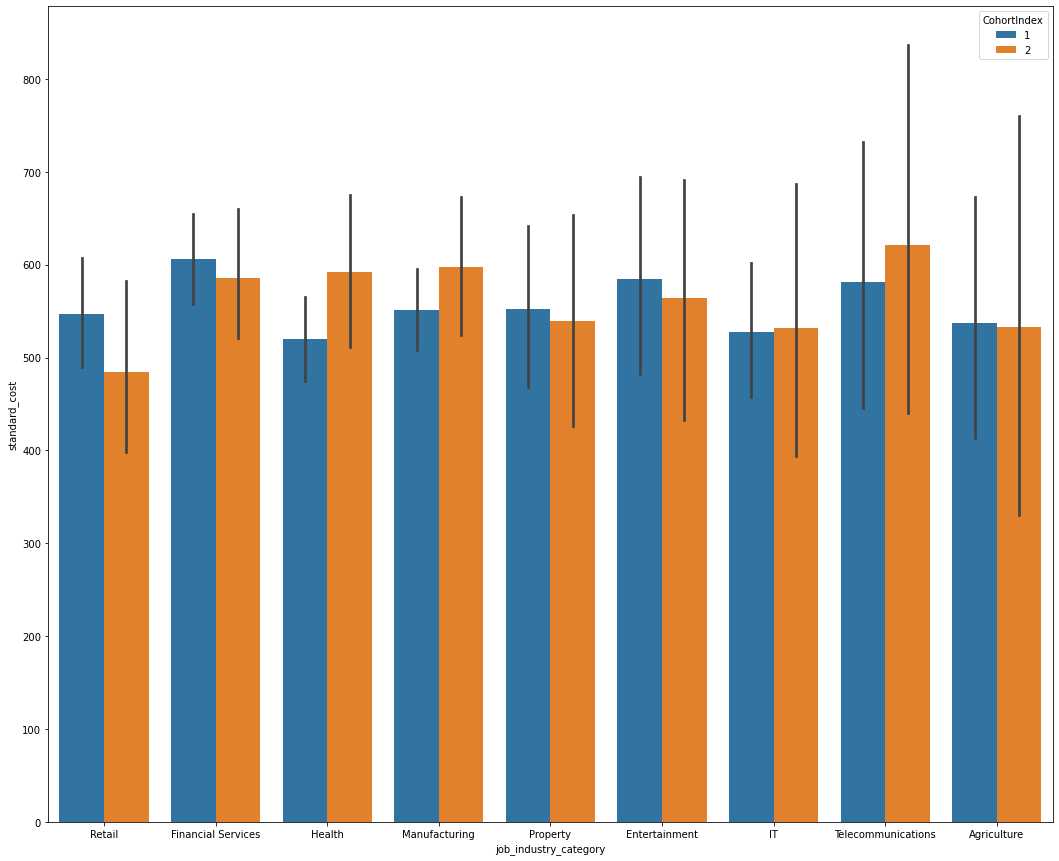

In [85]:
plt.figure(figsize=(18, 15))
sns.barplot(x=trans_cust_20170101_df['job_industry_category'], y=trans_cust_20170101_df['standard_cost'], hue=trans_cust_20170101_df['CohortIndex'], data=trans_cust_20170101_df, estimator=np.mean, ci=95, 
               n_boot=1000, 
               color=None, palette=None, saturation=.75, 
               errcolor=".26")

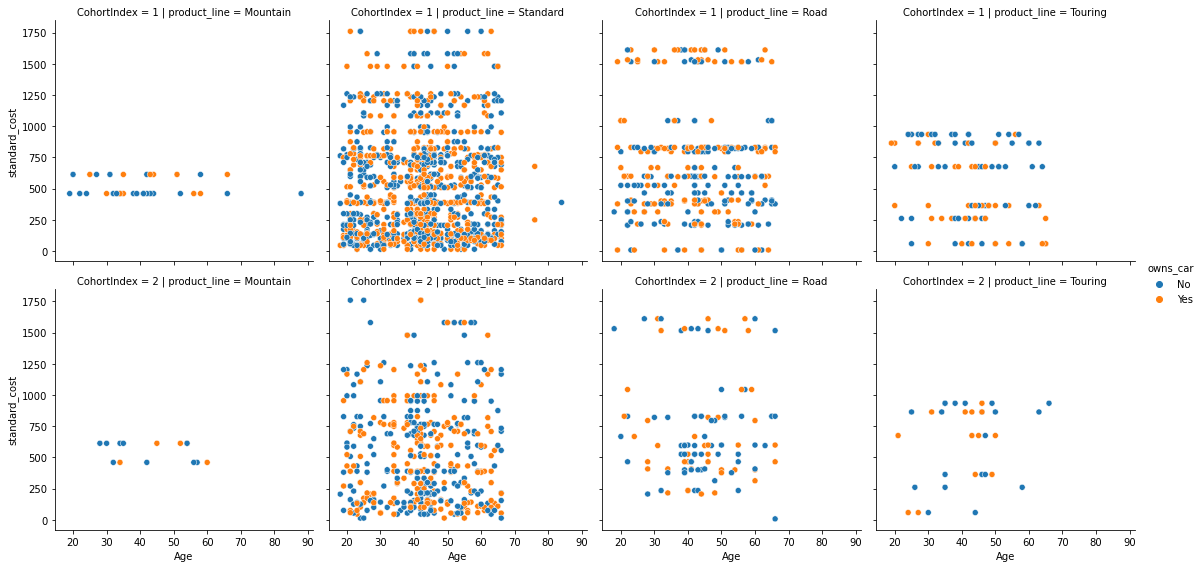

In [75]:
sns.color_palette('pastel')
ax = sns.relplot(data=trans_cust_20170101_df, kind='scatter', x=trans_cust_20170101_df['age'], y=trans_cust_20170101_df['standard_cost'], hue=trans_cust_20170101_df['owns_car'], col=trans_cust_20170101_df['product_line'],row=trans_cust_20170101_df['CohortIndex'], height=4)
ax.set(xlabel="Age")
plt.show()

In [76]:
#cohortmonth 2017-07,corhortIndex(5-6) merger customer_demo,EDA
transaction_201707_df = transaction_df[(transaction_df['CohortMonth']== '2017-07-01')&(transaction_df['CohortIndex'] >4)&(transaction_df['CohortIndex']<7)]

In [77]:
trans_cust_201707_df = pd.merge(transaction_201707_df,customer_demo_df,how='left',on='customer_id')
trans_cust_201707_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,122,24,1038,2017-12-01,True,Approved,Solex,Road,medium,large,...,U,57,NaT,44.0,Engineer I,Manufacturing,Mass Customer,N,Yes,10.657041
1,1068,96,2215,2017-12-11,True,Approved,WeareA2B,Road,low,small,...,Female,50,1971-02-20,49.0,Structural Engineer,Financial Services,Mass Customer,N,Yes,18.000000
2,1092,92,3395,2017-12-21,False,Approved,WeareA2B,Standard,medium,small,...,Male,76,1993-04-19,27.0,NaN,Financial Services,Mass Customer,N,No,3.000000
3,1751,22,2730,2017-11-21,False,Approved,WeareA2B,Standard,medium,medium,...,Male,15,1960-11-27,59.0,Senior Financial Analyst,Financial Services,Mass Customer,N,No,11.000000
4,2133,85,2694,2017-12-01,False,Approved,WeareA2B,Standard,medium,medium,...,Female,48,1985-12-28,34.0,Quality Engineer,Retail,Mass Customer,N,No,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,19190,68,1516,2017-11-23,True,Approved,OHM Cycles,Standard,medium,medium,...,Male,6,1967-07-12,52.0,VP Sales,IT,Affluent Customer,N,No,19.000000
72,19288,62,1516,2017-11-07,True,Approved,Solex,Standard,medium,medium,...,Male,6,1967-07-12,52.0,VP Sales,IT,Affluent Customer,N,No,19.000000
73,19461,20,1809,2017-11-19,True,Approved,Trek Bicycles,Standard,medium,small,...,Female,67,1961-01-26,59.0,Programmer II,Health,Mass Customer,N,Yes,19.000000
74,19604,74,926,2017-12-18,False,Approved,WeareA2B,Standard,medium,medium,...,Male,18,1965-10-14,54.0,Professor,Telecommunications,Affluent Customer,N,No,10.000000


<Figure size 36000x1080 with 0 Axes>

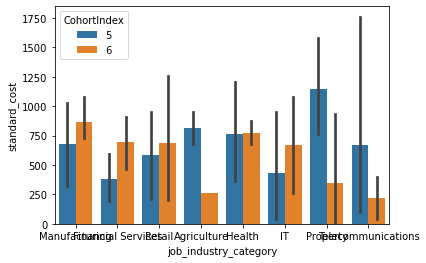

<Figure size 36000x1080 with 0 Axes>

In [79]:
sns.barplot(x=trans_cust_201707_df['job_industry_category'], y=trans_cust_201707_df['standard_cost'], hue=trans_cust_201707_df['CohortIndex'], data=trans_cust_201707_df, estimator=np.mean, ci=95, 
               n_boot=1000, 
               color=None, palette=None, saturation=.75, 
               errcolor=".26")
plt.figure(figsize=(500, 15))

<AxesSubplot:xlabel='wealth_segment', ylabel='standard_cost'>

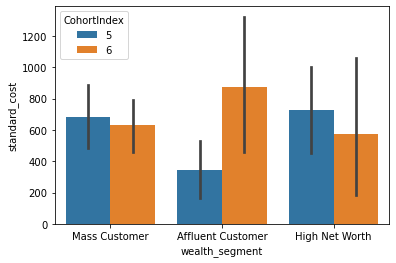

In [81]:
sns.barplot(x=trans_cust_201707_df['wealth_segment'], y=trans_cust_201707_df['standard_cost'], hue=trans_cust_201707_df['CohortIndex'], data=trans_cust_201707_df, estimator=np.mean, ci=95, 
               n_boot=1000, 
               color=None, palette=None, saturation=.75, 
               errcolor=".26")

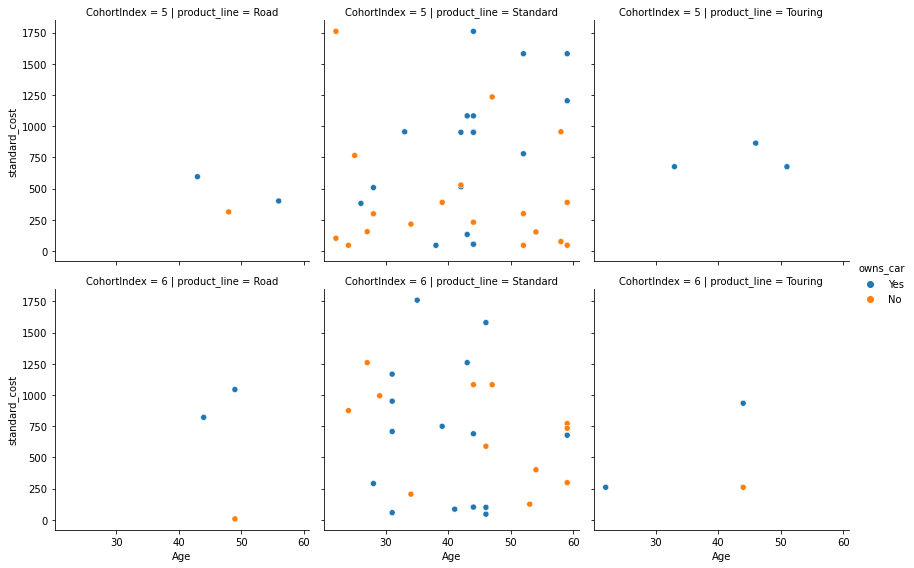

In [82]:
sns.color_palette('pastel')
ax = sns.relplot(data=trans_cust_201707_df, kind='scatter', x=trans_cust_201707_df['age'], y=trans_cust_201707_df['standard_cost'], hue=trans_cust_201707_df['owns_car'], col=trans_cust_201707_df['product_line'],row=trans_cust_201707_df['CohortIndex'], height=4)
ax.set(xlabel="Age")
plt.show()